In [9]:
library(nnet)
wholeSet = read.csv("./merged.csv")
set.seed(100)
trainingSize = nrow(wholeSet) * .9
trainingSetIndices = sample(1:nrow(wholeSet), trainingSize)
testingSetIndices = setdiff(rownames(wholeSet),trainingSetIndices)
trainingSet = wholeSet[trainingSetIndices,]
testingSet = wholeSet[testingSetIndices,]
formula = set~iperf+sysbench+ycruncher+pgbench

In [12]:
str(wholeSet)

'data.frame':	1360 obs. of  6 variables:
 $ iperf    : num  1158 1186 1201 1156 1167 ...
 $ sysbench : num  8.46 8.45 8.45 8.46 8.45 ...
 $ ycruncher: num  7.2 7.19 7.2 7.2 7.21 ...
 $ pgbench  : num  52355 62181 62119 58885 58885 ...
 $ set      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ vm       : int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
multinomModel <- multinom(formula, data=trainingSet) # multinom Model
summary (multinomModel) # model summary

# weights:  96 (75 variable)
initial  value 3393.648596 
iter  10 value 3253.989002
iter  20 value 3108.847926
iter  30 value 2817.804182
iter  40 value 2428.531104
iter  50 value 2145.739192
iter  60 value 2006.134488
iter  70 value 1967.662652
iter  80 value 1951.219845
iter  90 value 1945.379990
iter 100 value 1942.399130
final  value 1942.399130 
stopped after 100 iterations


Call:
multinom(formula = formula, data = trainingSet)

Coefficients:
   (Intercept)         iperf   sysbench  ycruncher       pgbench
2    8.5769612 -0.0013992961  72.116279 -114.92656  3.425619e-03
3    1.0532629 -0.0094182829 -15.435500   20.24151 -8.916908e-05
4    4.7804410  0.0005781555  13.387423  -41.86205  2.955137e-03
5    0.1013235 -0.0013266378  -9.778101  -13.90056  2.948209e-03
6   -4.3985988 -0.0081058343 -29.785504   22.86544  1.621567e-03
7   -5.7305985 -0.0174409552 -38.387205   39.34737  1.057321e-03
8  -13.5899283 -0.0241614455 -41.439791   40.02427  1.617074e-03
9   -8.4875347 -0.0250310594 -39.180882   39.61214  1.306291e-03
10  -3.4173883 -0.0290704697 -37.970632   39.59637  1.133200e-03
11  -5.3744315 -0.0281060618 -38.064244   39.64344  1.158659e-03
12   2.1384733 -0.0312840537 -40.509268   44.68832  8.147126e-04
13  -0.7488865 -0.0330396716 -33.990281   44.12881  7.885220e-05
14 -13.6904954 -0.0337251715 -30.379504   43.63841 -1.425895e-04
15   2.1464296 -0.035

In [4]:
predicted_scores <- predict (multinomModel, testingSet, "probs")
predicted_scores

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
7,4.526521e-01,5.556604e-05,5.180204e-01,7.834304e-05,1.276517e-05,1.991741e-03,3.479431e-03,9.489776e-05,6.443922e-04,8.805740e-04,1.082770e-03,4.981910e-04,8.218361e-03,1.008370e-02,2.206715e-03,3.662032e-08
25,3.180397e-04,1.911295e-01,5.375423e-04,4.496145e-01,2.539739e-01,7.157369e-02,8.842564e-03,7.350926e-03,7.473339e-03,3.572724e-03,5.144703e-03,3.707725e-04,7.042576e-05,2.247349e-05,4.890743e-06,1.261013e-10
33,5.148843e-02,2.039998e-27,7.328776e-01,1.202508e-22,1.423672e-22,2.936521e-12,1.620709e-08,5.317628e-13,1.558151e-10,1.803659e-09,1.621243e-09,7.068124e-08,8.955456e-03,1.598738e-01,4.680061e-02,4.098135e-06
39,2.150513e-01,4.560806e-09,7.074113e-01,1.010953e-06,9.924269e-07,2.071013e-03,9.295966e-03,1.798640e-04,1.263814e-03,1.586902e-03,2.004962e-03,1.285158e-03,2.372190e-02,2.915213e-02,6.973384e-03,3.382164e-07
51,1.288131e-03,3.195234e-02,3.163387e-03,3.004796e-01,2.703547e-01,2.306862e-01,4.647465e-02,3.165991e-02,3.601274e-02,1.844776e-02,2.629235e-02,2.358277e-03,5.845042e-04,1.998696e-04,4.556176e-05,1.564558e-09
57,8.169595e-02,7.618161e-11,5.851273e-01,1.691876e-08,1.716018e-08,2.299541e-04,3.856766e-03,7.054563e-05,7.480449e-04,1.576709e-03,1.794086e-03,2.104169e-03,1.023636e-01,1.741389e-01,4.629176e-02,2.222566e-06
73,1.381784e-05,2.739586e-02,3.827874e-05,3.653816e-01,5.087561e-01,6.738420e-02,6.028553e-03,1.116900e-02,7.113322e-03,2.600028e-03,3.903530e-03,1.995862e-04,1.260136e-05,2.831368e-06,6.478402e-07,2.651264e-11
111,9.157469e-06,8.172638e-03,3.398754e-05,2.734173e-01,5.699239e-01,9.432441e-02,9.552139e-03,2.099300e-02,1.231113e-02,4.345585e-03,6.562560e-03,3.320392e-04,1.751606e-05,3.747490e-06,8.704893e-07,4.406973e-11
117,1.835318e-05,2.605730e-02,4.101068e-05,3.806282e-01,5.078849e-01,6.439585e-02,4.851149e-03,7.317499e-03,4.683476e-03,1.576714e-03,2.418070e-03,1.178322e-04,7.609018e-06,1.720201e-06,3.779391e-07,1.541051e-11
122,1.244495e-04,2.218080e-03,5.007408e-04,1.660266e-01,3.858730e-01,2.606587e-01,4.513228e-02,5.323625e-02,4.207833e-02,1.693861e-02,2.518351e-02,1.776946e-03,1.905006e-04,5.019158e-05,1.175918e-05,6.681996e-10


In [5]:
predicted_class <- predict (multinomModel, testingSet)
table(predicted_class, testingSet$set)

               
predicted_class  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
             1   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             2   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             3   1  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0
             4   0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0
             5   0  0  0  1  3  1  0  0  0  0  0  0  0  0  0  0
             6   0  0  0  0  2  2  1  0  0  1  0  1  0  0  0  0
             7   0  0  0  0  0  0  3  1  1  5  0  2  0  0  0  0
             8   0  0  0  0  0  0  0  5  1  0  1  0  0  0  0  0
             9   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
             10  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0
             11  0  0  0  0  0  1  1  4  3  4  2  0  0  1  0  0
             12  0  0  0  0  0  0  0  0  3  2  3  3  2  0  0  0
             13  0  0  0  0  0  0  0  0  0  0  1  1  2  4  4  0
             14  0  0  0  0  0  0  0  0  0  0  0  0  0  1  3  0
             15  0  0  0

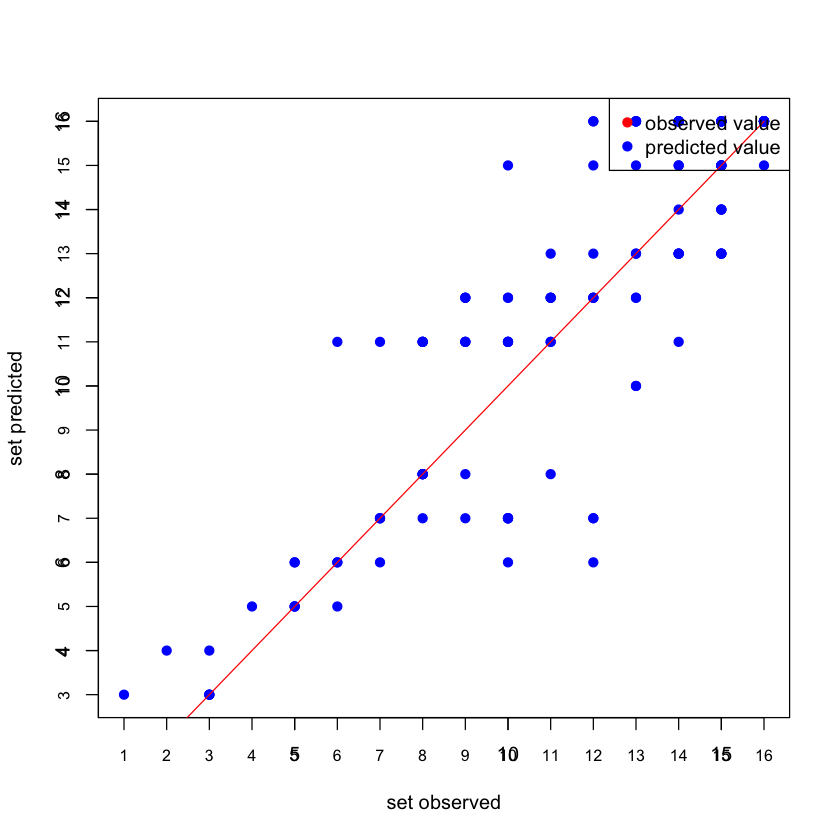

In [6]:
plot(x = testingSet$set , y = predicted_class,col="blue",pch=19,xlab="set observed",ylab="set predicted")
axis(1,1:16,1:16,cex.axis=0.8)
axis(2,1:16,1:16,cex.axis=0.8)
par(new=TRUE)
lines(x = range(1:16) , y = range(1:16),col="red")
legend("topright",legend=c("observed value","predicted value"),pch=19, col=c("red","blue"))

In [7]:
print("correct prediction")
mean(as.character(predicted_class) == as.character(testingSet$set))

[1] "correct prediction"


[1] 0.3382353